In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [96]:

train_data = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv", header=None, names=["id", "source", "category",'content'])
test_data =  pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv",header=None ,names=["id", "source", "category",'content'])


train_data.head()

id       source  category  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

([<matplotlib.patches.Wedge at 0x7f9c56b3e4a0>,
 [Text(0.6414093669225578, 0.8936408809046303, 'Negative'),
  Text(-1.0260553442286633, 0.39649770564254155, 'Positive'),
  Text(-0.31734499213929374, -1.0532293937999033, 'Neutral'),
  Text(0.9398173765782871, -0.5716146417662045, 'Irrelevant')])

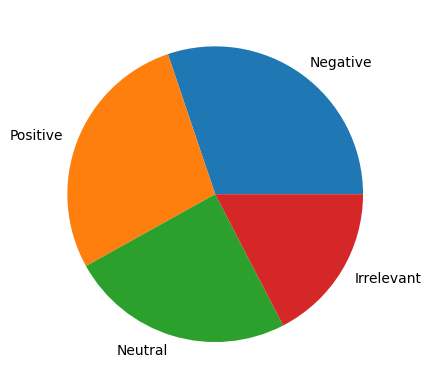

In [97]:
dc = train_data['category'].value_counts()
plt.pie(dc,labels=dc.index)


In [98]:
train_data = train_data.drop("id",axis=1)
test_data = test_data.drop("id",axis=1)

def remove_special_chars(text):
    # Replace special characters with a space
    text =  re.sub(r'(\-)|(\_)', ' ', text)
    text =  re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text


train_data = train_data[train_data['category'] != 'Irrelevant']
test_data = test_data[test_data['category'] != 'Irrelevant']

# remove null
train_data = train_data.dropna()
test_data = test_data.dropna()




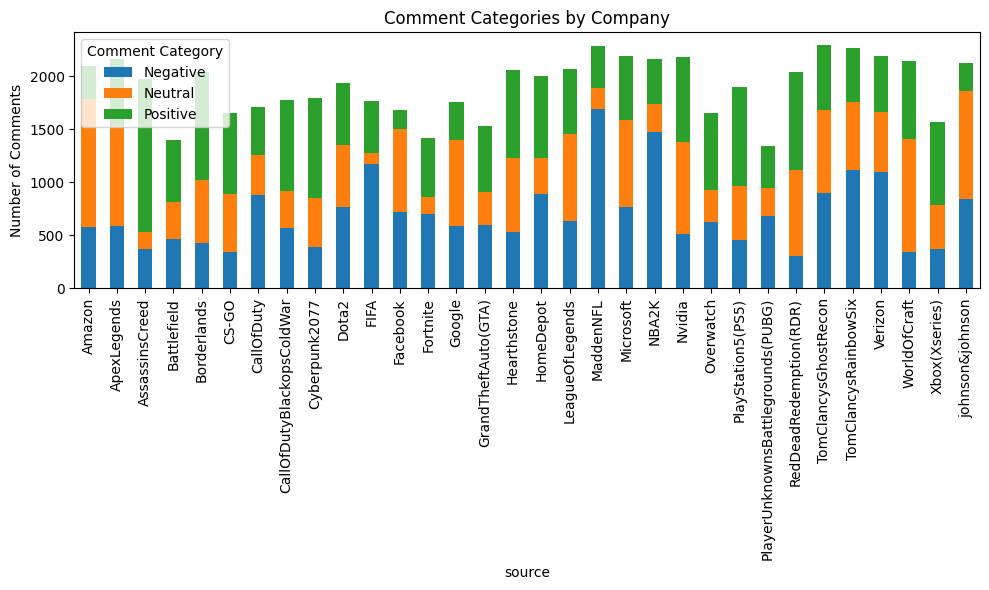

In [100]:
counts = train_data.groupby(['source', 'category']).size().unstack(fill_value=0)

# Plot
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('source')
ax.set_ylabel('Number of Comments')
ax.set_title('Comment Categories by Company')

# Show plot
plt.legend(title='Comment Category')
plt.tight_layout()
plt.show()

In [103]:
cv = CountVectorizer(binary=True).fit(train_data["content"])
train_X = cv.transform(train_data["content"])



In [111]:
model = RandomForestClassifier()
model.fit(X=train_X,y=train_data["category"])

RandomForestClassifier()

In [114]:
# test
test_X = cv.transform(test_data["content"])

In [121]:

y_pred = model.predict(test_X)
# print(y_pred)
print("\033[92mAccuracy:\033[0m ", accuracy_score(test_data["category"], y_pred))

Accuracy:  0.9782608695652174
